In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn import linear_model
from tqdm import tqdm_notebook as tqdm

import ampy
%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
alpha = 0.8
N = 1024
M = int(N * alpha)

A = np.random.normal(0.0, 1.0/ N**0.5, (M, N))
x_0 = np.random.normal(0.0, 1.0, N)
x_0 = np.random.binomial(1.0, 0.1, N) * x_0
y = A @ x_0 + np.random.normal(0.0, 1e-2, M)

In [4]:
lasso_cv = linear_model.LassoCV(cv=5, n_jobs=2, tol=1e-5)
lasso_cv.fit(A, y)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=2, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=1e-05,
    verbose=False)

In [5]:
lasso = linear_model.Lasso(alpha=lasso_cv.alpha_, tol=1e-12, max_iter=1e5)
lasso.fit(A, y)

Lasso(alpha=9.982984948295637e-06, copy_X=True, fit_intercept=True,
   max_iter=100000.0, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=1e-12, warm_start=False)

No handles with labels found to put in legend.


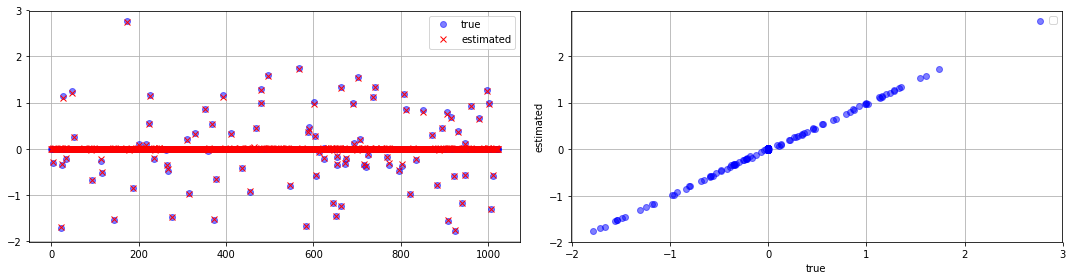

In [6]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(121)
ax.plot(x_0, "o", c="b", alpha =0.5, label="true")
ax.plot(lasso.coef_, "x", c="r", label="estimated")
ax.grid()
ax.legend()

ax = fig.add_subplot(122)
ax.plot(x_0, lasso.coef_, "o", c="b", alpha=0.5)
ax.set_xlabel("true")
ax.set_ylabel("estimated")
ax.grid()
ax.legend()

fig.tight_layout()

In [7]:
lasso = linear_model.Lasso(alpha=lasso_cv.alpha_, tol=1e-5, max_iter=1e5, warm_start=True)
l_list = lasso_cv.alpha_ * np.logspace(3, 0, base=10.0, num=100)
solution_lasso_list = []
lasso.alpha = l_list[0]
lasso.fit(A, y)
t1 = time.time()
for l in tqdm(l_list[1:]):
    lasso.alpha = l
    lasso.fit(A, y)
t2 = time.time()
print(t2 - t1, "sec")



1.1959948539733887 sec


In [10]:
dumping = 0.95
tol = 1e-4
max_iteration = 100

l_list = M * lasso_cv.alpha_ * np.logspace(2, 0, base=10.0, num=100)
vamp_solver = ampy.NaiveSelfAveragingLMMSEVAMPSolver.NaiveSelfAveragingLMMSEVAMPSolver(A, y, l_list[0], dumping)

vamp_solver.d = 0.95
vamp_solver.solve(max_iteration=max_iteration, tolerance=tol)
vamp_solver.d = dumping

solution_list = []
t1 = time.time()
for i, l in tqdm(enumerate(l_list[1:]), total=len(l_list[1:])):
    vamp_solver.l = l
    vamp_solver.solve(max_iteration=max_iteration, tolerance=tol, message=False)
    solution_list.append(vamp_solver.x_hat_1.copy())
#     print()
t2 = time.time()
print(t2 - t1, "sec")

converged
abs_diff= 6.499388120468613e-05
estimate norm= 3.080342016516554
relative diff=  2.1099566494952187e-05
iteration num= 6



converged
abs_diff= 4.4829596244484315e-05
estimate norm= 3.2509516640002416
relative diff=  1.3789684030343979e-05
iteration num= 3

converged
abs_diff= 4.521043651057592e-05
estimate norm= 3.4180528571832376
relative diff=  1.3226956515772875e-05
iteration num= 3

converged
abs_diff= 5.182644713760072e-05
estimate norm= 3.583941177471772
relative diff=  1.446074156109916e-05
iteration num= 3

converged
abs_diff= 5.5390815633068684e-05
estimate norm= 3.745327375301935
relative diff=  1.4789312143535456e-05
iteration num= 3

converged
abs_diff= 5.387928957672616e-05
estimate norm= 3.9017272170525383
relative diff=  1.3809086740161172e-05
iteration num= 3

converged
abs_diff= 6.637114759883695e-05
estimate norm= 4.056211809060725
relative diff=  1.6362840680700587e-05
iteration num= 3

converged
abs_diff= 6.209997743570338e-05
estimate norm= 4.210077194107025
relative diff=  1.4750318004293755e-05
iteration num= 3

converged
abs_diff= 6.149430557327268e-05
estimate norm= 4.3629761156651

converged
abs_diff= 9.576368988334848e-05
estimate norm= 8.356793754920005
relative diff=  1.1459381754751129e-05
iteration num= 2

converged
abs_diff= 9.21494224659168e-05
estimate norm= 8.376242621564815
relative diff=  1.1001283824883027e-05
iteration num= 2

converged
abs_diff= 8.903486932061728e-05
estimate norm= 8.39483152632673
relative diff=  1.0605914965821318e-05
iteration num= 2

converged
abs_diff= 8.743863010469295e-05
estimate norm= 8.412565276501127
relative diff=  1.0393812972713073e-05
iteration num= 2

converged
abs_diff= 9.081019850426785e-05
estimate norm= 8.429505133436825
relative diff=  1.0772897942022285e-05
iteration num= 2

converged
abs_diff= 9.454842107046703e-05
estimate norm= 8.445581543368828
relative diff=  1.1195016066679637e-05
iteration num= 2

converged
abs_diff= 9.512434348716144e-05
estimate norm= 8.460803501601392
relative diff=  1.1242944416467902e-05
iteration num= 2

converged
abs_diff= 9.03269157985195e-05
estimate norm= 8.475195893637402
rela

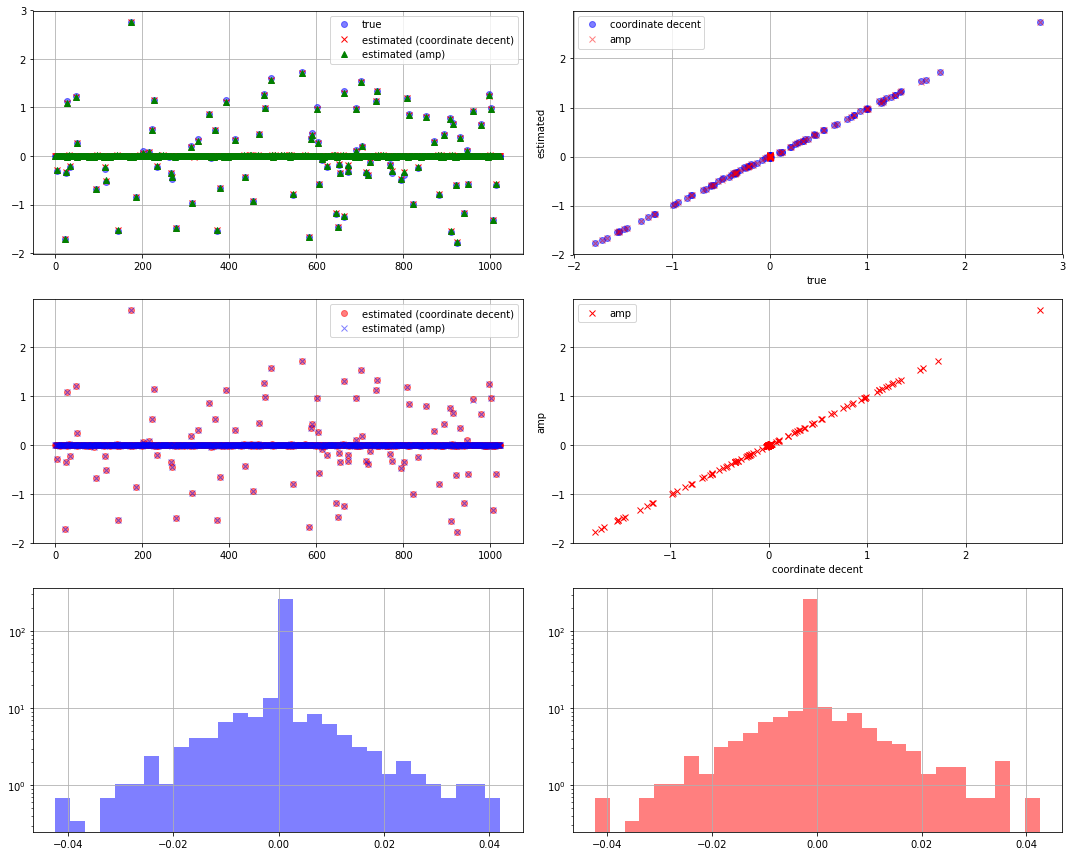

In [11]:

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(321)
ax.plot(x_0, "o", c="b", alpha =0.5, label="true")
ax.plot(lasso.coef_, "x", c="r", label="estimated (coordinate decent)")
ax.plot(vamp_solver.x_hat_1, "^", c="g", label="estimated (amp)")
ax.grid()
ax.legend()

ax = fig.add_subplot(322)
ax.plot(x_0, lasso.coef_, "o", c="b", alpha=0.5, label="coordinate decent")
ax.plot(x_0, vamp_solver.x_hat_1, "x", c="r", label="amp", alpha=0.5)
ax.set_xlabel("true")
ax.set_ylabel("estimated")
ax.grid()
ax.legend()

ax = fig.add_subplot(323)
ax.plot(lasso.coef_, "o", c="r", label="estimated (coordinate decent)", alpha=0.5)
ax.plot(vamp_solver.x_hat_1, "x", c="b", label="estimated (amp)", alpha=0.5)
ax.grid()
ax.legend()

ax = fig.add_subplot(324)
ax.plot(lasso.coef_, vamp_solver.x_hat_1, "x", c="r", label="amp")
ax.set_xlabel("coordinate decent")
ax.set_ylabel("amp")
ax.grid()
ax.legend()

ax = fig.add_subplot(325)
ax.hist(x_0 - lasso.coef_, density=True, bins=30, log=True, facecolor="b", alpha=0.5)
ax.grid()

ax = fig.add_subplot(326)
ax.hist(x_0 - vamp_solver.x_hat_1, density=True, bins=30, log=True, facecolor="r", alpha=0.5)
ax.grid()


fig.tight_layout()

In [17]:
tol = 1e-4
max_iteration = 100

l_list = M * lasso_cv.alpha_ * np.logspace(2, 0, base=10.0, num=100)
vamp_solver = ampy.NaiveSelfAveragingLMMSEVAMPSolver.NaiveSelfAveragingLMMSEVAMPSolver(A, y, l_list[0], dumping)

vamp_solver.d = 0.95
vamp_solver.solve(max_iteration=max_iteration, tolerance=tol)


converged
abs_diff= 7.829281832847718e-05
estimate norm= 3.0804089892158992
relative diff=  2.54163712034895e-05
iteration num= 6



array([-1.99804665e-10,  2.70650346e-08, -6.11635983e-11, ...,
       -8.04113695e-10, -9.93485963e-10, -3.85827932e-10])

In [18]:
vamp_solver.d = 0.95
# vamp_solver.d = 1.1
vamp_solver.l = l_list[-1]
estimator_list = []
gamma_1_list = []
gamma_2_list = []
for i in tqdm(range(50)):
    estimator = vamp_solver.solve(max_iteration=1, tolerance=tol)
    gamma_1_list.append(vamp_solver.gamma_1)
    gamma_2_list.append(vamp_solver.gamma_2)
    estimator_list.append(estimator)
diff_list = []
for estimator in estimator_list:
    diff = np.linalg.norm(x_0 - estimator)**2 / np.linalg.norm(x_0)**2
    diff_list.append(diff)

does not converged.
abs_diff= 0.2929274224288237
estimate norm= 11.1078668232963
relative diff=  0.026371168027912707
iteration num= 1

does not converged.
abs_diff= 0.3824655489843716
estimate norm= 6.525364537337156
relative diff=  0.05861213527550241
iteration num= 1

does not converged.
abs_diff= 0.22577229339593002
estimate norm= 8.143761376920013
relative diff=  0.027723343421601772
iteration num= 1

does not converged.
abs_diff= 0.058095464232696584
estimate norm= 8.401424316676831
relative diff=  0.006914954184301472
iteration num= 1

does not converged.
abs_diff= 0.02680855660261602
estimate norm= 8.492336504973773
relative diff=  0.0031567939620521213
iteration num= 1

does not converged.
abs_diff= 0.010296645499467662
estimate norm= 8.632796369572675
relative diff=  0.0011927358249476869
iteration num= 1

does not converged.
abs_diff= 0.004144300786704844
estimate norm= 8.673300621073054
relative diff=  0.0004778227998503428
iteration num= 1

does not converged.
abs_diff= 0.

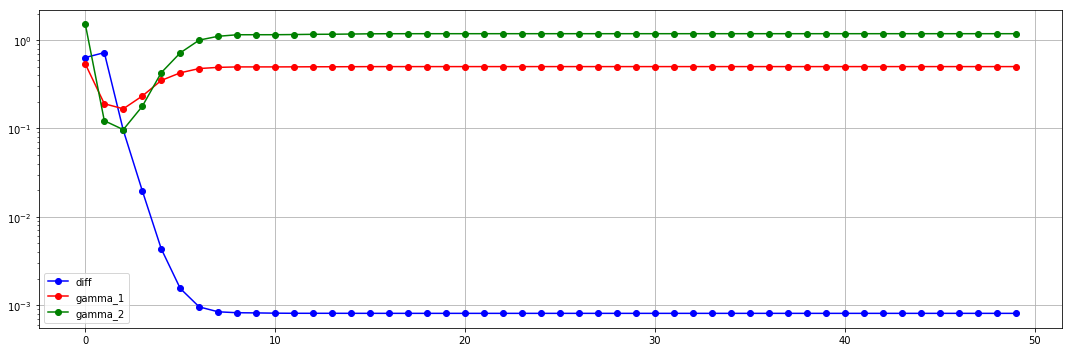

In [19]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(diff_list, "-o", c="b", label="diff")
ax.plot(gamma_1_list, "-o", c="r", label="gamma_1")
ax.plot(gamma_2_list, "-o", c="g", label="gamma_2")
ax.legend()
ax.set_yscale("log")

ax.grid()
fig.tight_layout()